In [1]:
#import all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read ipl.csv file and print first 5 records
df=pd.read_csv("ipl data.csv")


In [3]:
#check total number of columns,entries note down your findings

#Findings:-
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
# find null values 
df.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
#drop umpire3 column as it contains more than 75% of null values
df.drop("umpire3",axis=1,inplace=True)


In [9]:
df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [10]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

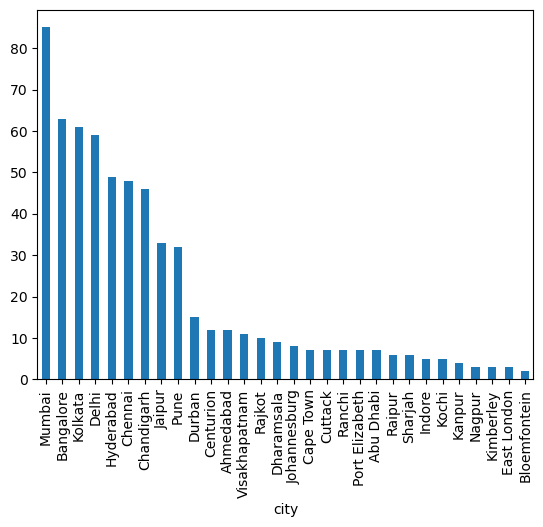

In [15]:
#which city hosted most number of matches?
#draw bar plot and write down your insights
a=df.groupby("city")["id"].count().sort_values(ascending=False).plot(kind="bar")

In [17]:
#find all venue of mumbai city
e=df.groupby("city").get_group("Mumbai")["venue"].value_counts()

Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: venue, dtype: int64

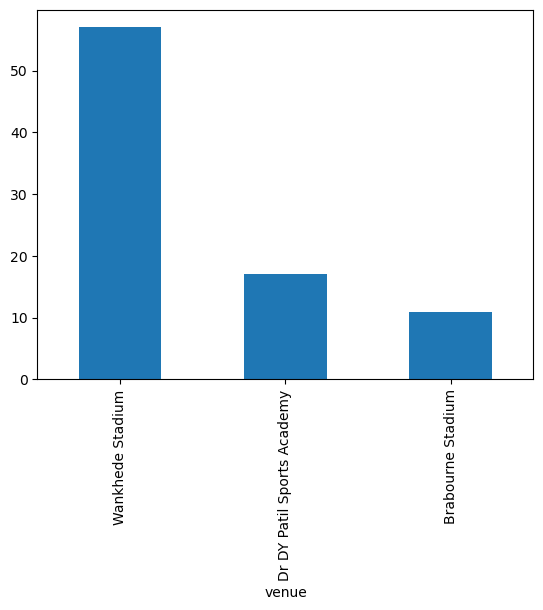

In [21]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)
e=df.groupby("city").get_group("Mumbai")
f=e.groupby("venue")["id"].count().sort_values(ascending=False).plot(kind="bar")

In [23]:
#what is the preferred choice after winning a toss in mumbai
c=df.groupby("city").get_group("Mumbai")
f=c.groupby("toss_decision")["id"].count()
f

toss_decision
bat      34
field    51
Name: id, dtype: int64

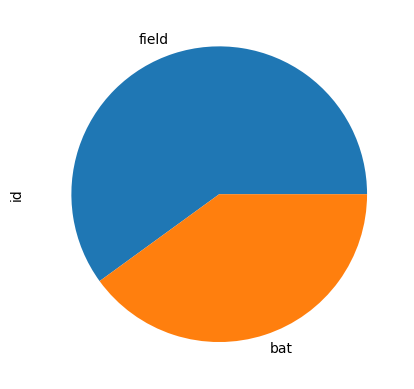

In [27]:
#graphical representation of above question
f=c.groupby("toss_decision")["id"].count().sort_values(ascending=False).plot(kind="pie")

In [32]:
#which team won most number of toss :-Mumbai Indians
df["toss_winner"].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

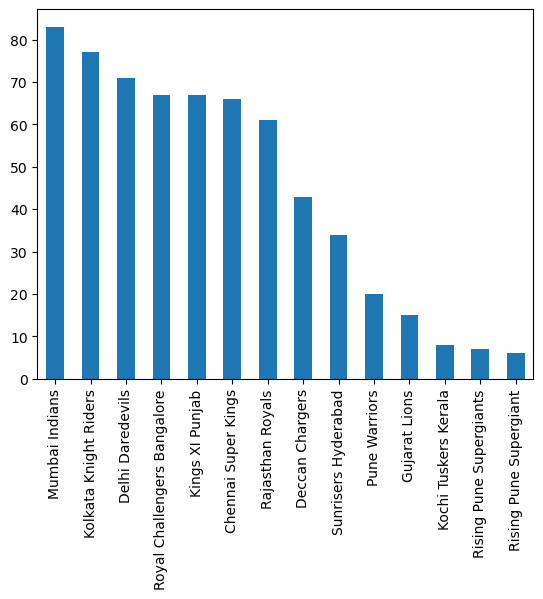

In [36]:
#show graphical representation of above question
g=df["toss_winner"].value_counts().sort_values(ascending=False).plot(kind="bar")

In [39]:
#find what mumbai indians preferred after winning a toss?
d=df.groupby("toss_winner").get_group("Mumbai Indians")
d["toss_decision"].value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

In [43]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings


In [42]:
#Which team won most of the matches in mumbai?
a=df.groupby("city").get_group("Mumbai")["winner"].value_counts()
a

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

In [46]:
#how many times each team won the toss and won the match in mumbai
p=df[(df["toss_winner"]==df["winner"])&(df["city"]=="Mumbai")]
p


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba


In [52]:
p.groupby("winner")["id"].count()

winner
Chennai Super Kings             5
Deccan Chargers                 3
Delhi Daredevils                2
Gujarat Lions                   1
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Mumbai Indians                 26
Rajasthan Royals                2
Royal Challengers Bangalore     2
Name: id, dtype: int64

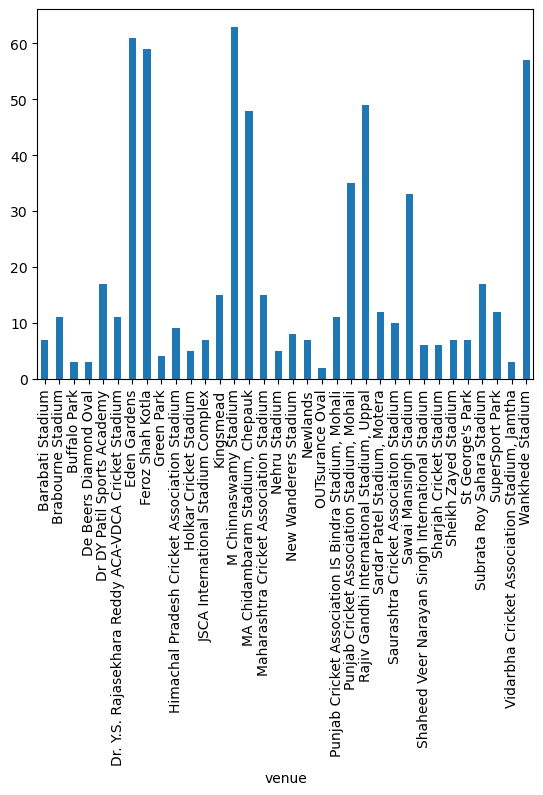

In [54]:
#which venue hosted most number of matches
a=df.groupby("venue")["id"].count().plot(kind="bar")



In [59]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?
f=df[(df["venue"]=="M Chinnaswamy Stadium")&((df["team1"]=="Chennai Super Kings"))]
f



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin
301,302,2011,Bangalore,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen
378,379,2012,Bangalore,2012-05-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,38,0,MS Dhoni,M Chinnaswamy Stadium,BF Bowden,HDPK Dharmasena
537,538,2015,Bangalore,2015-04-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Chennai Super Kings,27,0,SK Raina,M Chinnaswamy Stadium,JD Cloete,C Shamshuddin


In [63]:
#who won most matches at M Chinnaswamy stadium?--Royal Challengers Bangalore
m=df.groupby("venue").get_group("M Chinnaswamy Stadium")["winner"]
m.value_counts()


Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

In [69]:
#matches played in each year
df[(df["season"]==2013)]



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel


In [70]:
#which city hosted most number of matches in 2013 
df.groupby("season").size()


season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    53
2015    57
2016    60
2017    58
dtype: int64

In [23]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)
